In [1]:
#Basic import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Ml tools

from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   OneHotEncoder,
                                    LabelEncoder,
                                )
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import ( cross_val_predict,
                                     cross_val_score,
                                     train_test_split,
                                     GridSearchCV,
                                     StratifiedKFold,
                                    RandomizedSearchCV)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline , make_pipeline
from scipy.stats import randint
from scipy import stats
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.impute import SimpleImputer
import warnings
warnings.simplefilter("ignore")


In [2]:
df = pd.read_csv(r"C:\Users\vicky\OneDrive\Desktop\ml_Final_Assignment\Lab_assesment\Data\hotel.csv")


In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.shape

(36275, 19)

In [7]:
num_cols = df.select_dtypes(include=['number'])\
                .columns.difference(['Booking_ID']).tolist()
cat_cols = df.select_dtypes(include=['object', 'category'])\
                .columns.difference(['Booking_ID']).tolist()

In [8]:
def show_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in '{column}':\n{unique_values}\n")

In [9]:
show_unique_values(df[cat_cols])

Unique values in 'booking_status':
['Not_Canceled' 'Canceled']

Unique values in 'market_segment_type':
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']

Unique values in 'room_type_reserved':
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

Unique values in 'type_of_meal_plan':
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']



In [10]:
def unique_counts(df):
    num_unique = df.nunique().sort_values(ascending=False)
    pct_unique = ((df.nunique().sort_values(ascending=False) / len(df)) * 100).round(3)
    pct_unique = pct_unique.astype(str) + '%'
    
    unique = pd.DataFrame({
        'Unique Count': num_unique,
        'Percentage Unique': pct_unique
    })

    return unique

In [11]:
unique_counts(df)

,Unique Count,Percentage Unique
Booking_ID,36275,100.0%
avg_price_per_room,3930,10.834%
lead_time,352,0.97%
no_of_previous_bookings_not_canceled,59,0.163%
arrival_date,31,0.085%
no_of_week_nights,18,0.05%
arrival_month,12,0.033%
no_of_previous_cancellations,9,0.025%
no_of_weekend_nights,8,0.022%
room_type_reserved,7,0.019%


we need to drop Booking_ID column becaues ecah value in it is unique

In [12]:
df.drop('Booking_ID', axis=1, inplace=True)

In [13]:
def calculate_missing_data(df):

    missing_ratio = (df.isnull().sum() / len(df)) * 100

    missing_data = missing_ratio[missing_ratio > 0]

    missing_data_df = pd.DataFrame({'Missing Ratio %': missing_data}).sort_values('Missing Ratio %', ascending=False)

    return missing_data_df 

In [14]:
calculate_missing_data(df)

,Missing Ratio %


In [15]:
df.duplicated().sum()

np.int64(10275)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [17]:
df.describe(include = 'object')

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275
unique,4,7,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,27835,28130,23214,24390


#### As we can see some of column not balanced we must carry about this

### Split the Data

In [18]:
X = df.drop('booking_status',axis=1)
y = df[['booking_status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [19]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
9078,2,0,1,2,Meal Plan 1,0,Room_Type 1,273,2018,5,13,Offline,0,0,0,95.00,0,Canceled
36042,2,0,1,3,Meal Plan 1,0,Room_Type 1,158,2018,6,30,Online,0,0,0,90.95,1,Canceled
5929,2,0,2,1,Meal Plan 1,0,Room_Type 1,59,2018,11,26,Online,0,0,0,93.60,1,Not_Canceled
6928,1,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,10,25,Aviation,0,0,0,95.00,0,Not_Canceled
34607,2,2,2,4,Meal Plan 1,0,Room_Type 6,54,2018,4,29,Online,0,0,0,187.85,0,Canceled


### Data Exploration

In [20]:
train_cop = train.copy()

In [21]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
            'market_segment_type', 'repeated_guest', 'booking_status']
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
           'arrival_year','arrival_month','arrival_date','lead_time','no_of_previous_cancellations', 
          'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

### Univariate Analysis

#### Num Feature

In [22]:
def num_plot_dist(df, num_features):
        fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
        if len(num_features) == 1:
            axes = [axes] 
        for i, column in enumerate(num_features):
            sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
            axes[i][0].set_title(f'Histogram with KDE for {column}')
            
            sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
            axes[i][1].set_title(f'Box Plot for {column}')
        
        plt.tight_layout()
        plt.show()

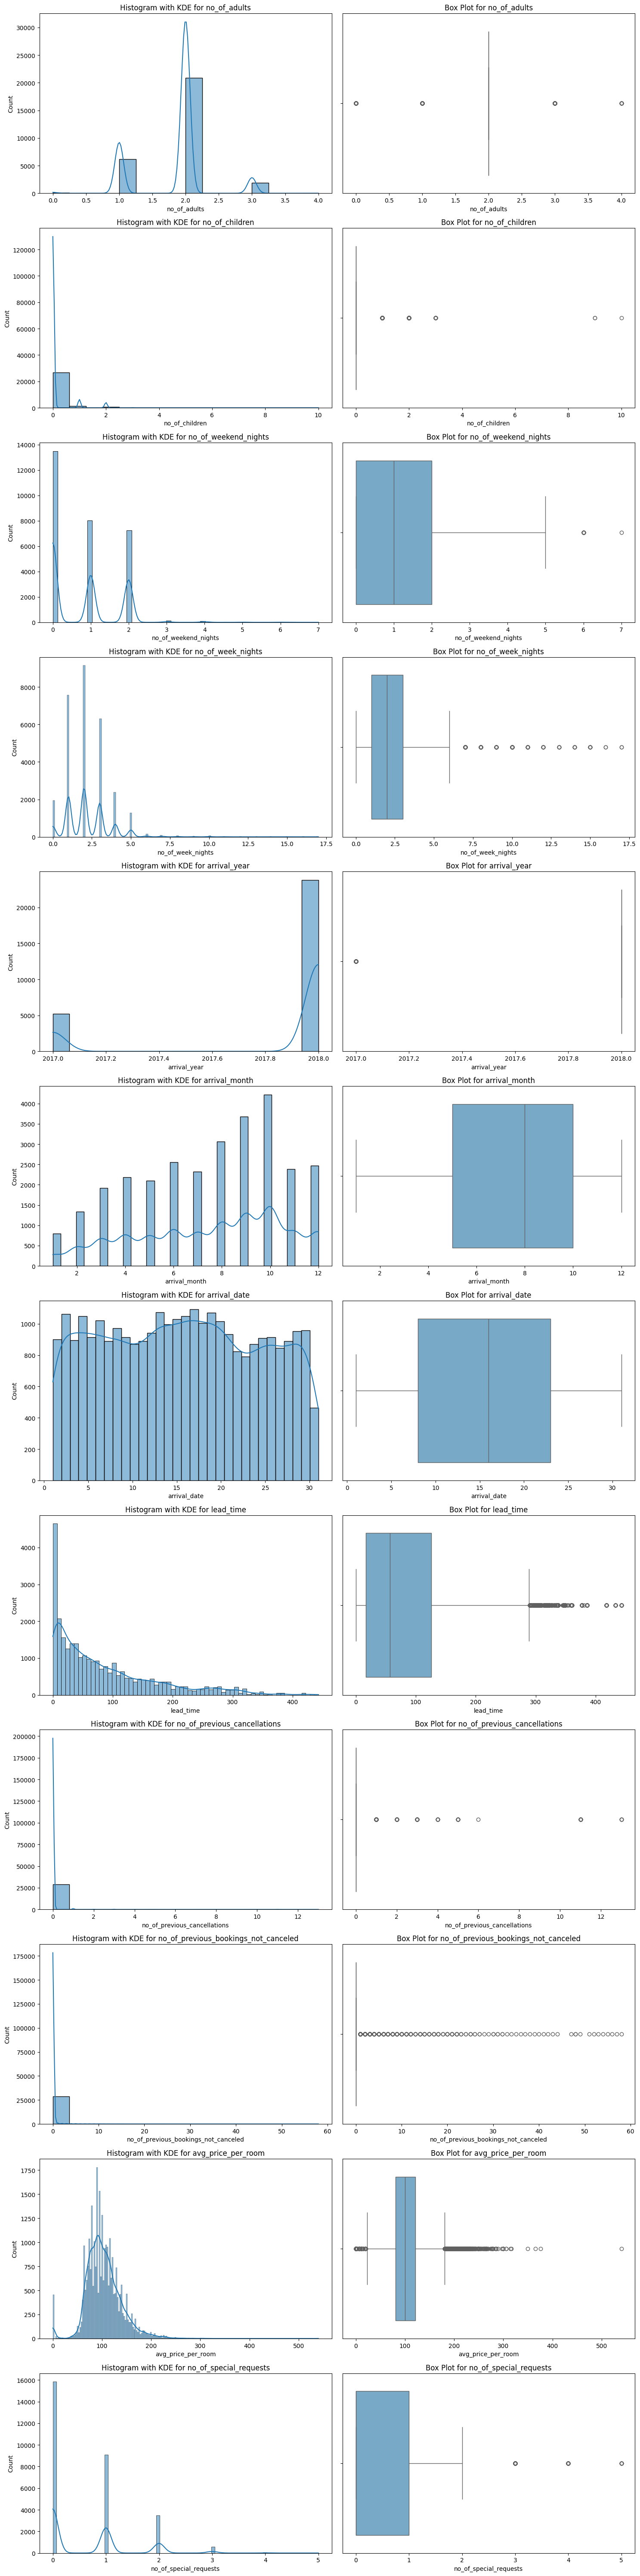

In [23]:
num_plot_dist(train_cop, num_cols)

In [24]:
df[df['no_of_adults']==0]['no_of_children'].value_counts()

no_of_children
2    133
3      5
1      1
Name: count, dtype: int64

#### the some chlidren can booking so when no_of_adults = 0 the no_of_children > 0

### Cat Feature

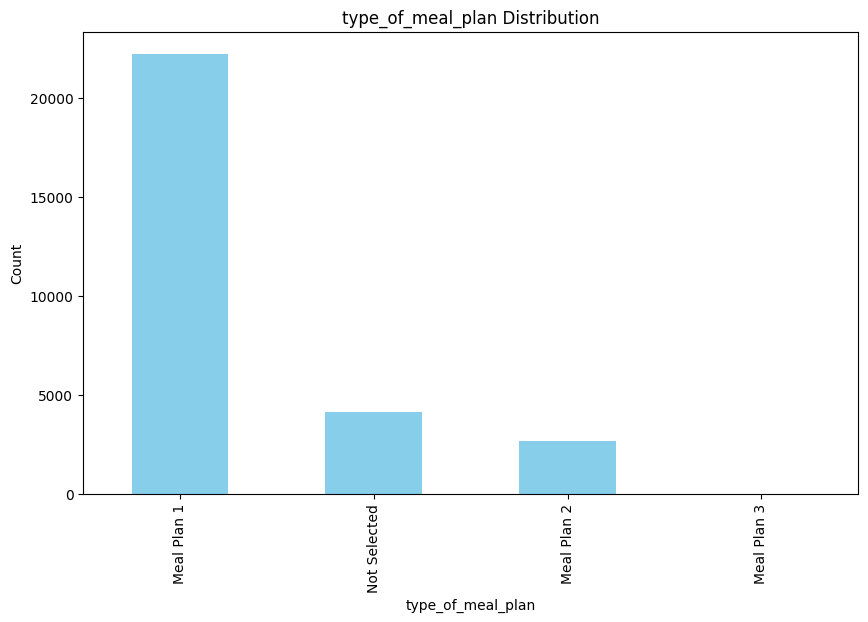

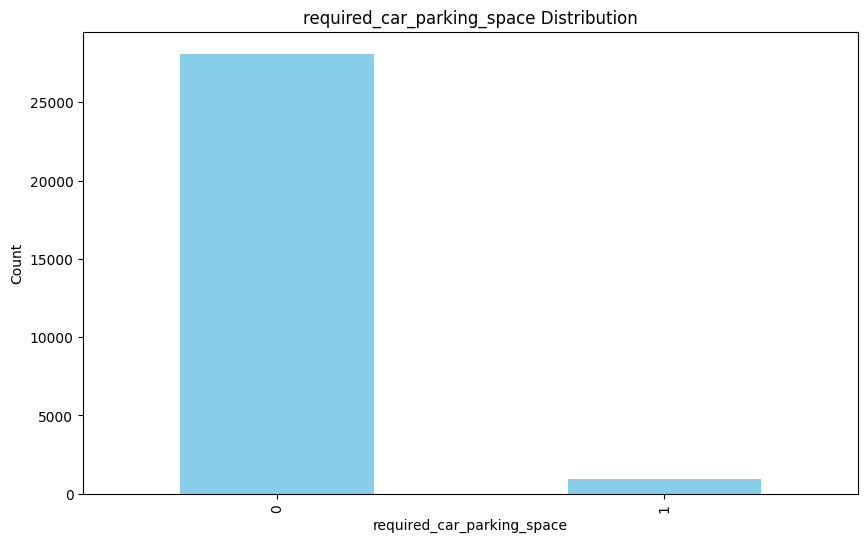

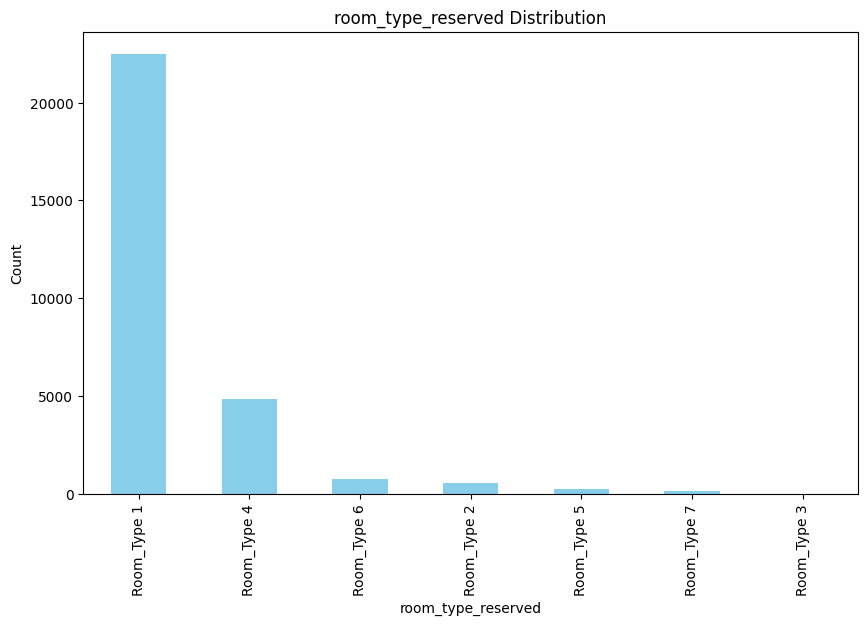

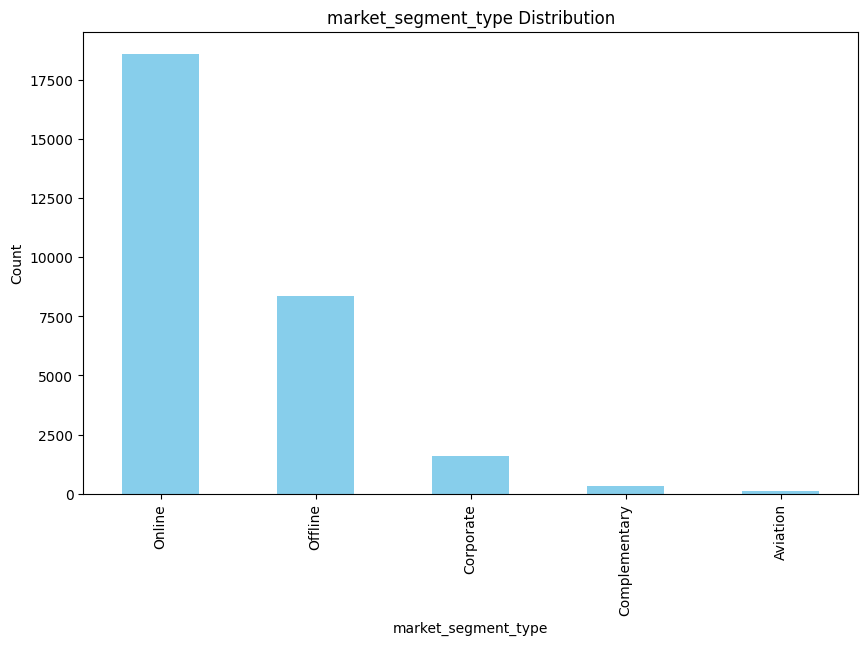

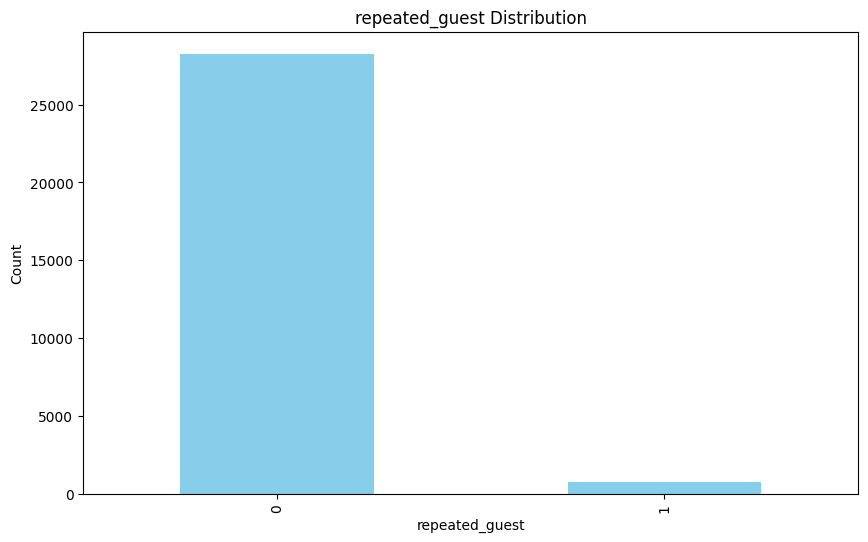

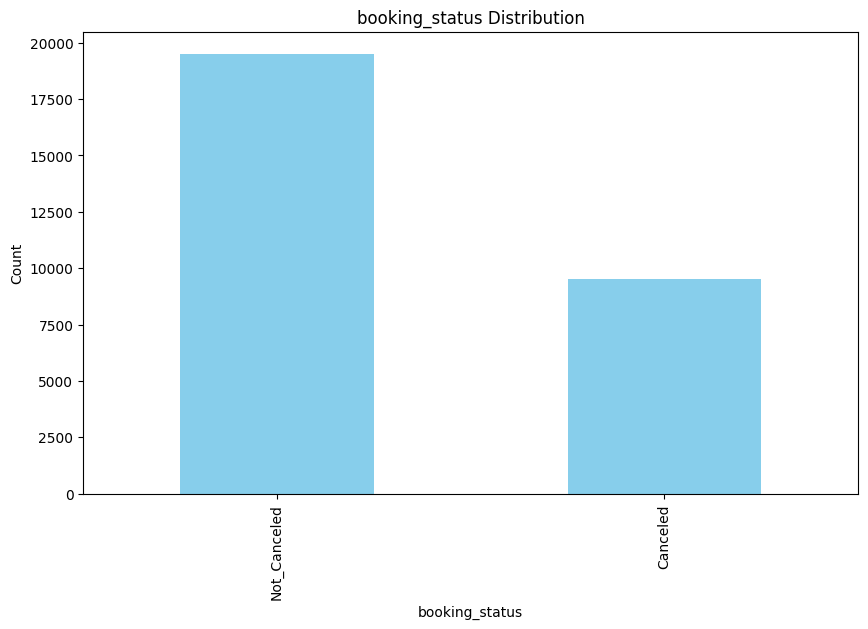

In [25]:
for cat_feature in cat_cols:
        plt.figure(figsize=(10, 6))
        train_cop[cat_feature].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'{cat_feature} Distribution')
        plt.xlabel(cat_feature)
        plt.ylabel('Count')
        plt.show()

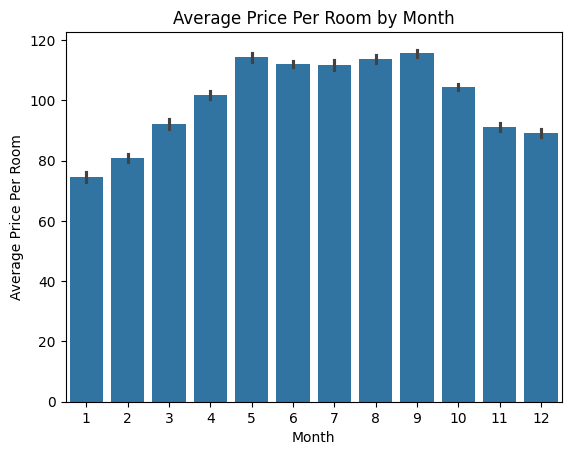

In [39]:
sns.barplot(x='arrival_month', y='avg_price_per_room',data=train_cop)


plt.xlabel('Month')
plt.ylabel('Average Price Per Room')
plt.title('Average Price Per Room by Month')
plt.show()

#### Dropping any column which has 80% of values with the same value

In [26]:
def get_frequency_dataframes(df, cat_cols):
        freq_dfs = [
            df.groupby([cat_column]).size().reset_index(name="count")
            for cat_column in cat_cols
        ]
        return freq_dfs, num_cols, cat_cols

In [27]:
freq_dfs, _, _= get_frequency_dataframes(train_cop, cat_cols)

In [28]:
def drop_high_frequency_columns(freq_dfs, df, threshold=0.8):
     
        for count_df in freq_dfs:
            highest_freq_percentage = (count_df["count"] / df.shape[0]).max()
            if highest_freq_percentage >= threshold:
                col_to_drop = count_df.columns[0]
                print(f'We will drop the column "{col_to_drop}" due to high frequency.')
                df = df.drop(columns=[col_to_drop])
        return df

In [29]:
_ = drop_high_frequency_columns(freq_dfs, train_cop)

We will drop the column "required_car_parking_space" due to high frequency.
We will drop the column "repeated_guest" due to high frequency.


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
def drop_high_vif_features(X_train, vif_threshold=20):

    feats_high_vif_to_be_dropped = []  # List to store the names of features dropped
    cleaned_df_from_multi_coll = X_train.copy()  # Start with a copy of the original dataframe
    num_cols_removed = 0  # Initialize a counter for the number of columns removed
    
    # Loop through the features of the dataframe
    for origin_df_feat_index in range(len(X_train.columns)):
        num_cols_removed = X_train.shape[1] - cleaned_df_from_multi_coll.shape[1]
        cleaned_df_feat_index = origin_df_feat_index - num_cols_removed

        # Calculate the VIF for the current feature
        VIF_FEAT = variance_inflation_factor(cleaned_df_from_multi_coll.values, cleaned_df_feat_index)
        
        # If VIF exceeds the threshold, drop the feature
        if VIF_FEAT > vif_threshold:
            feats_high_vif_to_be_dropped.append(cleaned_df_from_multi_coll.columns[cleaned_df_feat_index])
            cleaned_df_from_multi_coll = cleaned_df_from_multi_coll.drop(columns=[cleaned_df_from_multi_coll.columns[cleaned_df_feat_index]])
    
    return cleaned_df_from_multi_coll, feats_high_vif_to_be_dropped

In [32]:
_, feats_high_vif_to_be_dropped = drop_high_vif_features(train_cop[num_cols])

In [33]:
feats_high_vif_to_be_dropped

['arrival_year']

will drop arrival_year because multi-colinearity

### Correlation

In [34]:
train_cop['booking_status'] = train_cop['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})

In [35]:
def plot_correlation_heatmap(df, num_features):
    
    corr = df[num_features].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show() 

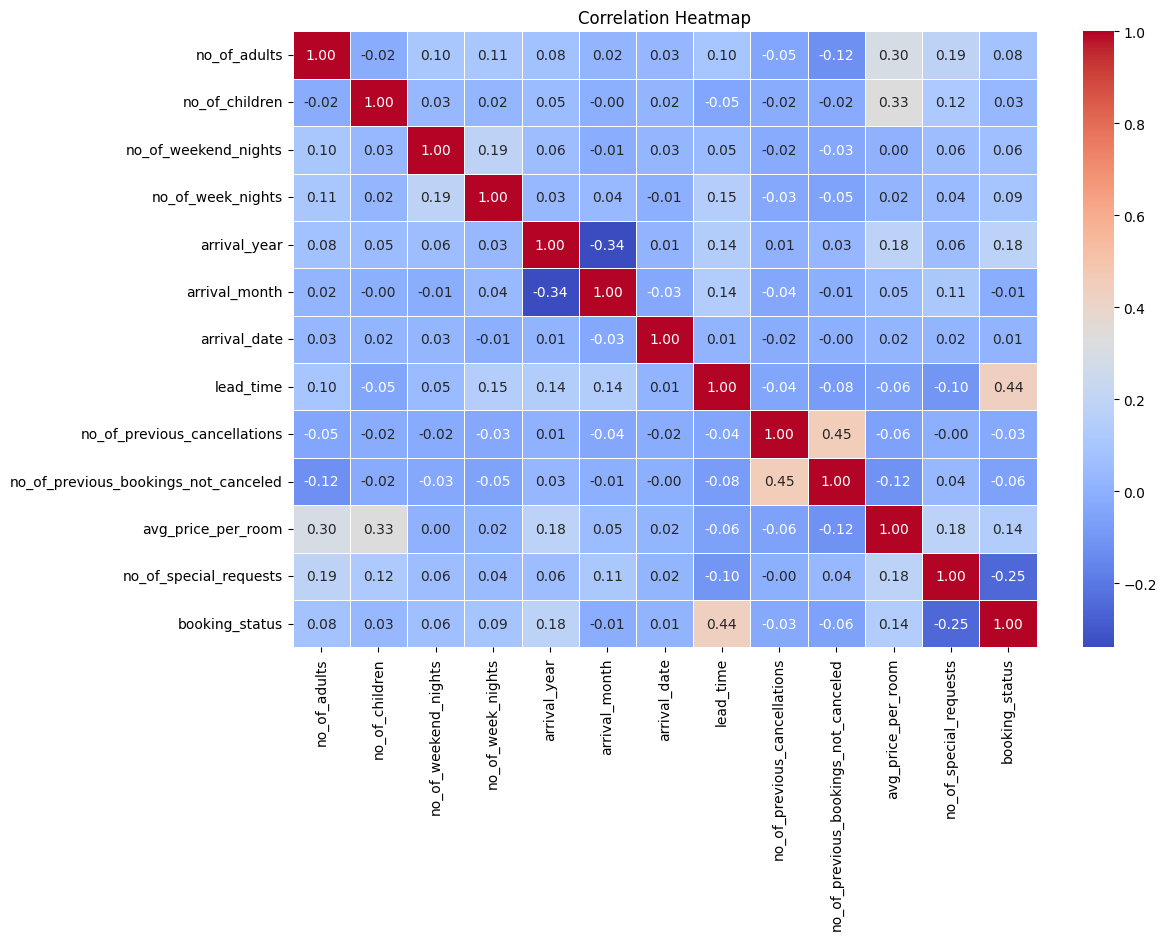

In [36]:
plot_correlation_heatmap(train_cop, num_cols + ['booking_status'])

In [37]:
class ColumnSelector(TransformerMixin, BaseEstimator):

    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        X = X[self.columns]
        return X
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

In [38]:
class Transformation(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, skew_threshold=1):
        
        self.cols = cols
        self.skew_threshold = skew_threshold
        self.skewed_columns = [] 

    def fit(self, X, y=None):
        
        if self.cols is None:
            self.cols = X.select_dtypes(include=[np.number]).columns
        
        self.skewed_columns = [
            col for col in self.cols if abs(X[col].skew()) > self.skew_threshold
        ]
        return self

    def transform(self, X):
        
        X_copy = X.copy()
        for col in self.skewed_columns:
            # Apply log transformation
            X_copy[col] = np.log1p(X_copy[col])
        return X_copy

    def fit_transform(self, X, y=None):
       
        return self.fit(X, y).transform(X)

In [39]:
class ScalingTransform(BaseEstimator, TransformerMixin):

    def __init__(self, cols, scaling_method):
        self.cols = cols
        self.scaler_ = None
        self.scaling_method = scaling_method

    def fit(self, X, y=None):
        if self.scaling_method == "std_scale":
            self.scaler_ = StandardScaler().fit(X.loc[:, self.cols])
        elif self.scaling_method == "min_max_scale":
            self.scaler_ = MinMaxScaler().fit(X.loc[:, self.cols])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.loc[:, self.cols] = self.scaler_.transform(X_copy.loc[:, self.cols])
        return X_copy

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [40]:
class OneHotEncodeColumns(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
        self.encoder = None
        self.column_names = None

    def fit(self, X, y=None):
        # FIX: use sparse_output instead of sparse
        self.encoder = OneHotEncoder(
            sparse_output=False, 
            drop='first'
        )
        self.encoder.fit(X[self.cols])
        self.column_names = self.encoder.get_feature_names_out(self.cols)
        return self

    def transform(self, X):
        X_copy = X.copy()

        encoded_data = self.encoder.transform(X_copy[self.cols])
        encoded_df = pd.DataFrame(
            encoded_data, 
            columns=self.column_names, 
            index=X_copy.index
        )

        X_copy = X_copy.drop(columns=self.cols)
        X_copy = pd.concat([X_copy, encoded_df], axis=1)

        return X_copy

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)


In [41]:
class LabelEncodeColumns(BaseEstimator, TransformerMixin):

    def __init__(self, cols):
        self.cols = cols
        self.encoders_ = {}

    def fit(self, X, y=None):
        for col in self.cols:
            encoder = LabelEncoder()
            encoder.fit(X[col])
            self.encoders_[col] = encoder
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col, encoder in self.encoders_.items():
            X_copy[col] = encoder.transform(X_copy[col])
        return X_copy

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [42]:
class OrdinalEncodeColumns(BaseEstimator, TransformerMixin):
    def __init__(self, cols, categories=None):

        self.cols = cols
        self.categories = categories
        self.encoder = None

    def fit(self, X, y=None):

        self.encoder = OrdinalEncoder(categories=self.categories)
        self.encoder.fit(X[self.cols])
        return self

    def transform(self, X):

        X_copy = X.copy()


        encoded_data = self.encoder.transform(X_copy[self.cols])


        encoded_df = pd.DataFrame(encoded_data, columns=self.cols, index=X_copy.index)

        X_copy = X_copy.drop(columns=self.cols)
        X_copy = pd.concat([X_copy, encoded_df], axis=1)

        return X_copy
    
    def fit_transform(self, X, y=None):

        self.fit(X, y)
        return self.transform(X)

In [43]:
class DropColumnsTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, cols=None):
        self.cols = cols
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.cols is None:
            return X
        else:
            return X.drop(self.cols,axis=1)

In [44]:
class QuarterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        conditions = [
            (X[self.column] <= 3),
            (X[self.column] > 3) & (X[self.column] <= 6),
            (X[self.column] > 6) & (X[self.column] <= 9),
            (X[self.column] >= 10)
        ]

        values = [1, 2, 3, 4]   # NUMERIC VALUES (no dtype issue)

        X['quarter'] = np.select(conditions, values, default=1)

        return X

In [45]:
class FullPipeline1:
    def __init__(self):

        # all columns except target
        self.all_cols = df.drop('booking_status', axis=1).columns.tolist()

        # Columns to drop after all transformations
        self.drop_cols = [
            'arrival_year',
            'arrival_date',
            'arrival_month',   # we will convert month → quarter, so month not needed
            'room_type_reserved_Room_Type 2',
            'room_type_reserved_Room_Type 3',
            'room_type_reserved_Room_Type 5',
            'type_of_meal_plan_Not Selected',
            'type_of_meal_plan_Meal Plan 3'
        ]

        # Columns that should be one-hot encoded
        self.one_hot_encode_cols = [
            'market_segment_type',
            'type_of_meal_plan',
            'room_type_reserved',
            'quarter'
        ]

        # columns for scaling (numeric only)
        self.scale_cols = num_cols

        # target encoding
        self.label_encode = ['booking_status']

        # Full feature pipeline
        self.full_pipeline = Pipeline([
            ('selector', ColumnSelector(columns=self.all_cols)),

            # Converts month → quarter (numeric)
            ('quarter_transform', QuarterTransformer(column='arrival_month')),

            # Power or log transform on numeric features
            ('power_transformation', Transformation(cols=num_cols)),

            # One-hot encode categorical columns
            ('one_hot_encode', OneHotEncodeColumns(cols=self.one_hot_encode_cols)),

            # Scale numeric features after OHE
            ('scaling', ScalingTransform(
                cols=self.scale_cols,
                scaling_method="min_max_scale"
            )),

            # Drop unnecessary columns
            ('drop_cols', DropColumnsTransformer(cols=self.drop_cols))
        ])

        # Target pipeline
        self.y_pipeline = Pipeline([
            ('selector', ColumnSelector(columns=['booking_status'])),
            ('label_encode', LabelEncodeColumns(cols=self.label_encode))
        ])

    def fit_transform(self, X_train, y_train):
        X_train = self.full_pipeline.fit_transform(X_train)
        y_train = self.y_pipeline.fit_transform(y_train)
        return X_train, y_train

    def transform(self, X_test, y_test):
        X_test = self.full_pipeline.transform(X_test)
        y_test = self.y_pipeline.transform(y_test)
        return X_test, y_test


In [46]:
full_pipeline1 = FullPipeline1()
X_train1, y_train1 = full_pipeline1.fit_transform(X_train, y_train)
X_test1, y_test1 = full_pipeline1.transform(X_test, y_test)

In [47]:
X_combined = np.concatenate([X_train1, X_test1], axis=0)

y = np.concatenate([y_train1, y_test1], axis=0)
X = pd.DataFrame(X_combined, columns=X_train1.columns)

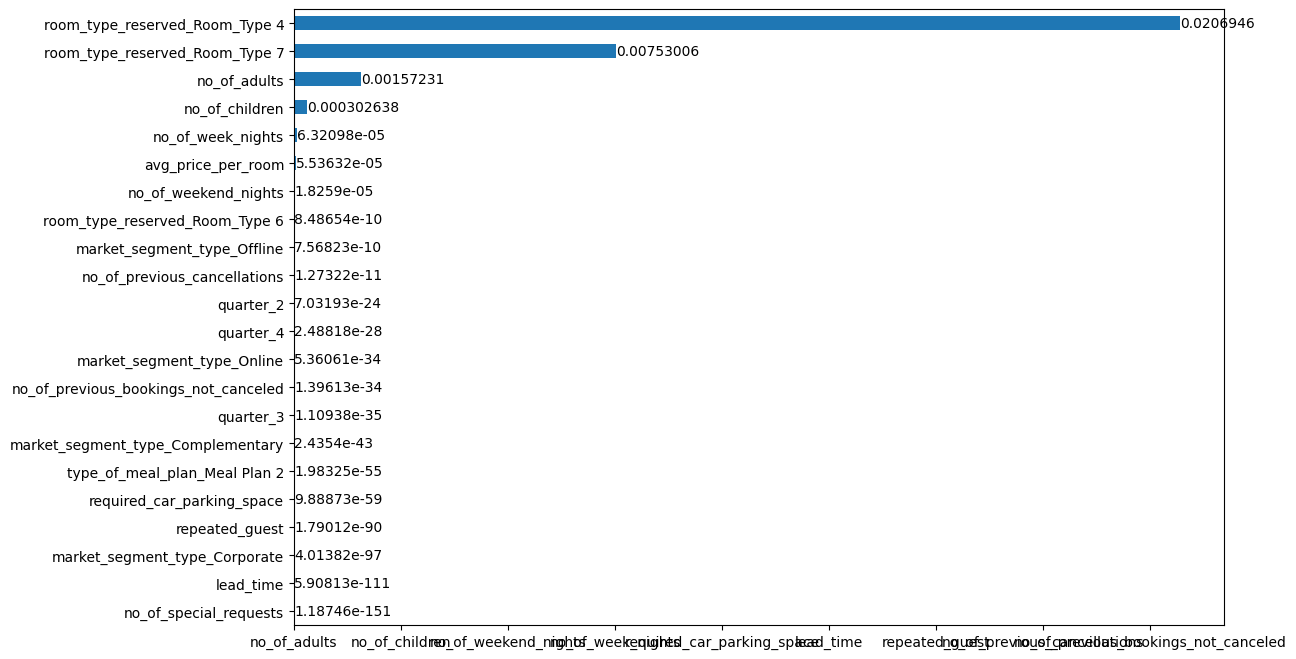

In [48]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = True , inplace = True)
plt.figure(figsize=(12, 8))
fig = p_values.plot(kind='barh')
fig.set_xticklabels(X.columns)
fig.bar_label(fig.containers[0], label_type='edge')
plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.2, stratify=over_y, random_state = 42)

In [50]:
def baseline_cls(X_train, y_train, X_test, y_test):


    base = DummyClassifier()
    base.fit(X_train, y_train)
    

    y_pred_base = base.predict(X_test)
    

    accuracy = accuracy_score(y_test, y_pred_base)
    f1 = f1_score(y_test, y_pred_base)
    roc_auc = roc_auc_score(y_test, y_pred_base)
    

    print(f"Your baseline model achieves accuracy = {accuracy}")
    print(f"Your baseline model achieves F1 score = {f1}")
    print(f"Your baseline model achieves ROC AUC = {roc_auc}")

In [51]:
# Basic ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# XGBoost
from xgboost import XGBClassifier

In [52]:
models = [
    LogisticRegression(random_state=ord("S")),
    DecisionTreeClassifier(random_state=ord("S")),
    RandomForestClassifier(random_state=ord("S")),
    ExtraTreesClassifier(random_state=ord("S")),
    GradientBoostingClassifier(random_state=ord("S")),
    XGBClassifier(random_state=ord("S"), use_label_encoder=False, eval_metric='logloss'),
    AdaBoostClassifier(random_state=ord("S")),
    BaggingClassifier(random_state=ord("S")),
    KNeighborsClassifier(),
    GaussianNB(),

]

In [53]:
def evaluate_models_cls(models, over_X_train, over_y_train, over_X_test, over_y_test, cv=5):
    results = []

    for model in models:
        start = time.time()

        # Cross-validation
        cv_results = cross_validate(
            model,
            over_X_train,
            over_y_train,
            cv=cv,
            scoring=['accuracy', 'roc_auc', 'f1'],
            return_train_score=True
        )

        # Train scores
        train_accuracy = np.mean(cv_results['train_accuracy'])
        train_roc_auc = np.mean(cv_results['train_roc_auc'])
        train_f1 = np.mean(cv_results['train_f1'])

        # Fit model
        model.fit(over_X_train, over_y_train)

        # Predict (labels)
        test_preds = model.predict(over_X_test)

        # Predict probabilities (if available)
        try:
            test_proba = model.predict_proba(over_X_test)[:, 1]
        except:
            # For models without predict_proba (e.g., SVM without probability=True)
            test_proba = test_preds

        # Test scores
        test_accuracy = accuracy_score(over_y_test, test_preds)
        test_f1 = f1_score(over_y_test, test_preds)

        # Handle AUC safely
        try:
            test_roc_auc = roc_auc_score(over_y_test, test_proba)
        except:
            test_roc_auc = np.nan

        # Store results
        results.append({
            'model': model.__class__.__name__,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'train_f1': train_f1,
            'test_f1': test_f1,
            'train_roc_auc': train_roc_auc,
            'test_roc_auc': test_roc_auc,
            'time_sec': round(time.time() - start, 4)
        })

    # Results dataframe
    df_results = pd.DataFrame(results)
    df_results.set_index('model', inplace=True)
    df_results = df_results.sort_values(by='test_accuracy', ascending=False)

    return df_results


In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import cross_validate

results_df = evaluate_models_cls(models, over_X_train, over_y_train, over_X_test, over_y_test, cv=5)
results_df